In [90]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
import pickle

%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

#特征选取
def feature_selection(dataset):
    return dataset[[
        ' Destination Port', 'Bwd Packet Length Max',' Bwd Packet Length Min', ' Bwd Packet Length Std',
        ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Min', ' Fwd IAT Min', ' Bwd Packets/s', ' Min Packet Length',
        ' Max Packet Length', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' Label'
    ]]

In [91]:
print("Let's start")

#Data preprocessing
dataroot="../MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df=pd.read_csv(dataroot,header=0,low_memory=False)

#df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
pd.set_option('mode.use_inf_as_na', True) # convert inf to nan
df['Flow Bytes/s']=df['Flow Bytes/s'].astype('float64')
df[' Flow Packets/s']=df[' Flow Packets/s'].astype('float64')
df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)
df[' Flow Packets/s'].fillna(df[' Flow Packets/s'].mean(),inplace=True)
df[' Label'] = df[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)

df.drop(df[df[' Label'] == 0].index, inplace=True)

df = feature_selection(df)

#train_test_split

#Feature scaling

scaler = preprocessing.MinMaxScaler()
print(df.values[0])
DDosMatrix=scaler.fit_transform(df.values)
print(DDosMatrix.shape)
print(DDosMatrix[0])

Let's start
[8.00000000e+01 5.84000000e+03 0.00000000e+00 2.13729708e+03
 1.43754667e+05 4.30865807e+05 2.00000000e+00 3.00000000e+00
 5.41045238e+00 0.00000000e+00 5.84000000e+03 2.29000000e+02
 2.00000000e+00 1.00000000e+00]
(128027, 14)
[0.00000000e+00 5.03665373e-01 0.00000000e+00 2.60815818e-01
 3.25236802e-03 7.49331838e-03 3.16741995e-07 3.39366424e-07
 5.41045238e-06 0.00000000e+00 5.03408405e-01 1.00000000e+00
 2.22222222e-01 0.00000000e+00]


In [92]:
dataroot2="../MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
df2=pd.read_csv(dataroot,header=0,low_memory=False)

#df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
pd.set_option('mode.use_inf_as_na', True) # convert inf to nan
df2['Flow Bytes/s']=df2['Flow Bytes/s'].astype('float64')
df2[' Flow Packets/s']=df2[' Flow Packets/s'].astype('float64')
df2['Flow Bytes/s'].fillna(df2['Flow Bytes/s'].mean(),inplace=True)
df2[' Flow Packets/s'].fillna(df2[' Flow Packets/s'].mean(),inplace=True)
df2[' Label'] = df2[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)

df2.drop(df2[df2[' Label'] == 1].index, inplace=True)

df2 = feature_selection(df2)
#train_test_split

#Feature scaling
BenignMatrix=scaler.fit_transform(df2.values)
print(BenignMatrix.shape)
print(BenignMatrix[0])

(97718, 14)
[8.37224562e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.73831772e-08 0.00000000e+00 5.60747648e-08 2.50000000e-08
 0.00000000e+00 1.78041543e-02 5.13698630e-04 0.00000000e+00
 5.17866390e-04 0.00000000e+00]


第1个属性的分布


/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


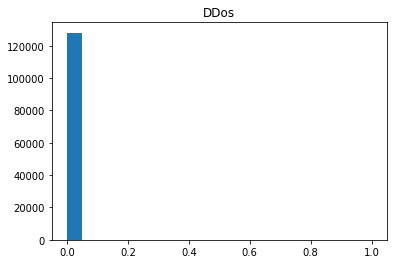

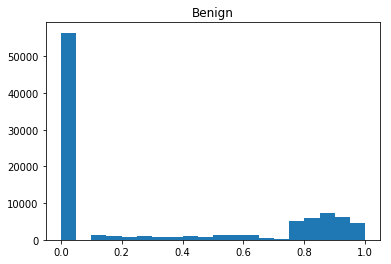

第2个属性的分布


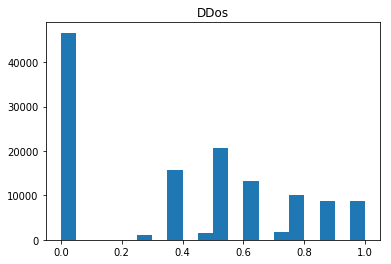

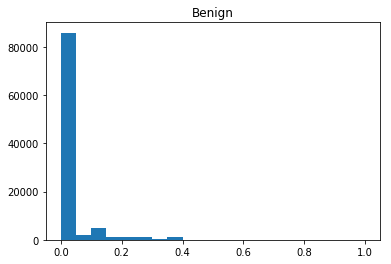

第3个属性的分布


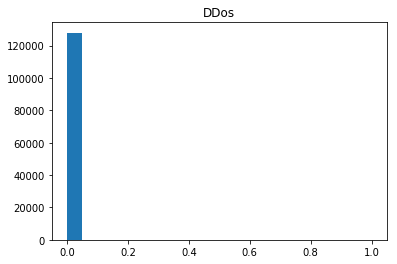

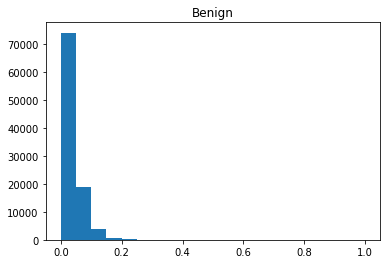

第4个属性的分布


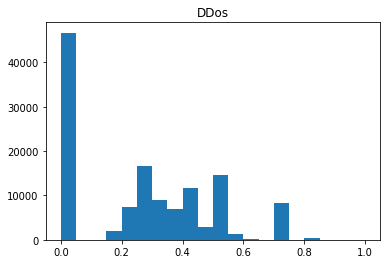

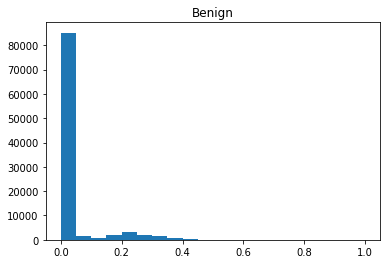

第5个属性的分布


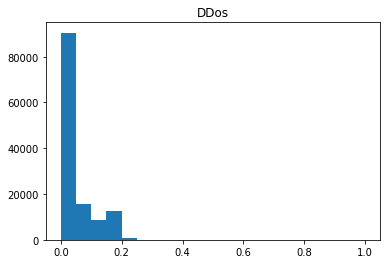

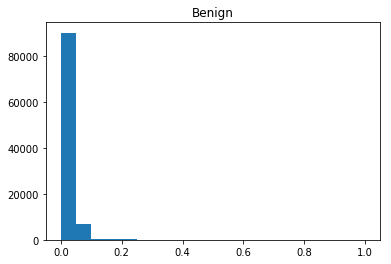

第6个属性的分布


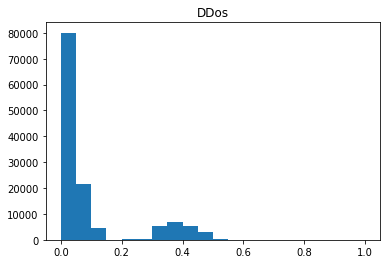

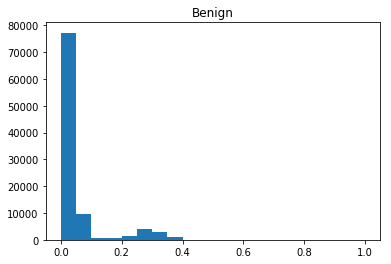

第7个属性的分布


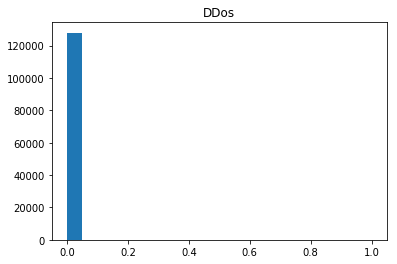

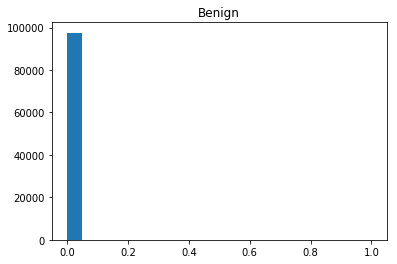

第8个属性的分布


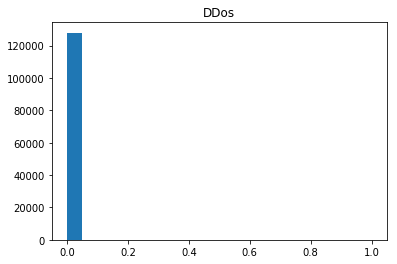

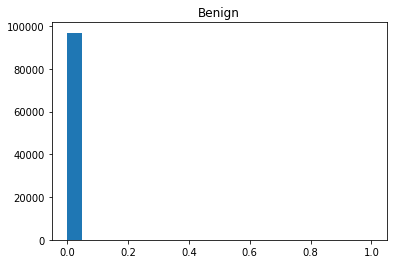

第9个属性的分布


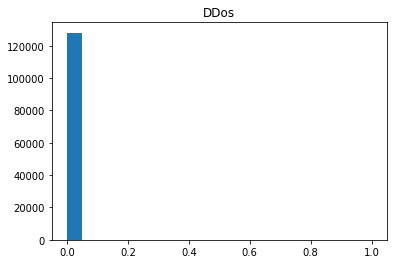

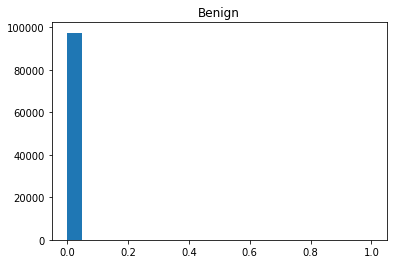

第10个属性的分布


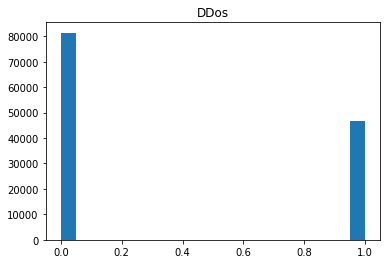

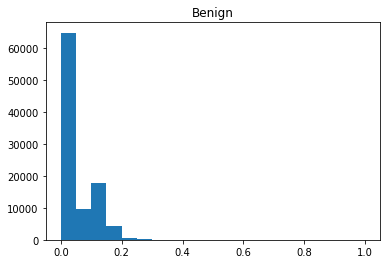

第11个属性的分布


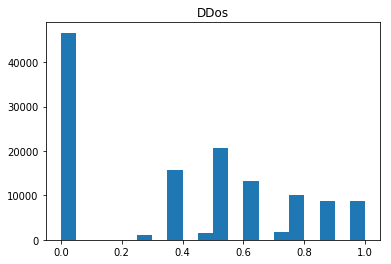

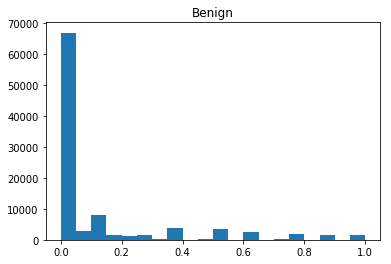

第12个属性的分布


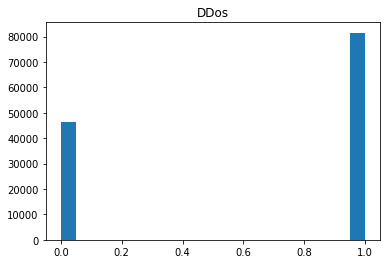

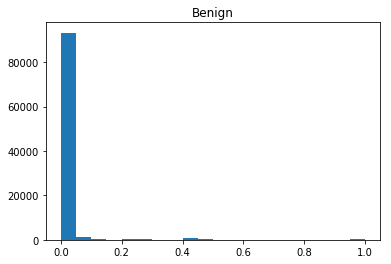

第13个属性的分布


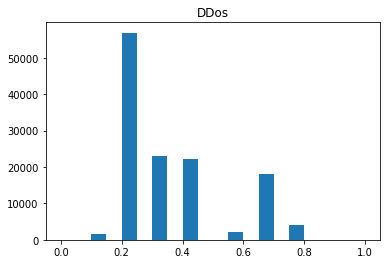

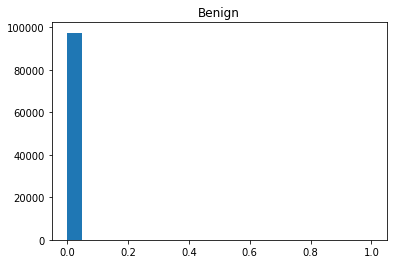

In [93]:

for i in range(13):
    print("第{}个属性的分布".format(i+1))
    plt.title("Benign")
    plt.hist(BenignMatrix[:,i],20)
    plt.show()
    plt.title("DDos")
    plt.hist(DDosMatrix[:,i],20)
    plt.show()

    


In [7]:
def save_obj(obj, name ):
    with open(''+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name ):
    with open('' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
#数理统计方法，按5%区间进行数理统计
def statistics(dataset, feature_index):
    intervals = {'{0}-{1}'.format(5 * x, 5 * (x+1) ): 0 for x in range(20)}
    for _ in dataset[:,feature_index]:
        for interval in intervals:
            start, end = tuple(interval.split('-'))
            if int(start) <= _*100 <= int(end):
                intervals[interval] += 1
    return intervals




In [25]:
#DDos的分布统计字典创建并存储至文件
DDoS_Distribution_set = {}
for i in range(78):
    StatisticObj = statistics(DDosMatrix, i)
    DDoS_Distribution_set[str(i)] = StatisticObj

print(DDoS_Distribution_set)
save_obj(DDoS_Distribution_set, "DDoS_Distribution_set")

[0.2 0.3 0.2 ... 0.3 0.2 0.3]
[0.00051787 0.         0.         ... 0.         0.00051787 0.        ]
{'0': {'0-5': 128024, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 1, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 0, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 1}, '1': {'0-5': 77716, '5-10': 23535, '10-15': 4792, '15-20': 5, '20-25': 480, '25-30': 0, '30-35': 13, '35-40': 0, '40-45': 14, '45-50': 0, '50-55': 14, '55-60': 0, '60-65': 0, '65-70': 2304, '70-75': 2631, '75-80': 6989, '80-85': 1416, '85-90': 2951, '90-95': 2783, '95-100': 2384}, '2': {'0-5': 47, '5-10': 1453, '10-15': 1453, '15-20': 0, '20-25': 56728, '25-30': 0, '30-35': 23180, '35-40': 22301, '40-45': 22301, '45-50': 0, '50-55': 1189, '55-60': 0, '60-65': 1001, '65-70': 18067, '70-75': 18067, '75-80': 4057, '80-85': 4057, '85-90': 3, '90-95': 3, '95-100': 1}, '3': {'0-5': 46528, '5-10': 0, '10-15': 129, '15-20': 0, '20-25': 22, '25-30'

In [27]:
DDoSDistributeObj = load_obj("DDoS_Distribution_set")
print(DDoSDistributeObj["2"])

{'0-5': 47, '5-10': 1453, '10-15': 1453, '15-20': 0, '20-25': 56728, '25-30': 0, '30-35': 23180, '35-40': 22301, '40-45': 22301, '45-50': 0, '50-55': 1189, '55-60': 0, '60-65': 1001, '65-70': 18067, '70-75': 18067, '75-80': 4057, '80-85': 4057, '85-90': 3, '90-95': 3, '95-100': 1}


In [28]:
#Benign的分布统计字典创建并存储至文件
Benign_Distribution_set = {}
for i in range(78):
    StatisticObj = statistics(BenignMatrix, i)
    Benign_Distribution_set[str(i)] = StatisticObj

print(Benign_Distribution_set)
save_obj(Benign_Distribution_set, "Benign_Distribution_set")

{'0': {'0-5': 56465, '5-10': 34, '10-15': 1414, '15-20': 903, '20-25': 671, '25-30': 1038, '30-35': 846, '35-40': 879, '40-45': 984, '45-50': 817, '50-55': 1276, '55-60': 1310, '60-65': 1227, '65-70': 536, '70-75': 303, '75-80': 5230, '80-85': 5920, '85-90': 7228, '90-95': 6135, '95-100': 4503}, '1': {'0-5': 70120, '5-10': 10506, '10-15': 1228, '15-20': 645, '20-25': 325, '25-30': 302, '30-35': 113, '35-40': 232, '40-45': 115, '45-50': 110, '50-55': 1238, '55-60': 766, '60-65': 1560, '65-70': 2861, '70-75': 795, '75-80': 1407, '80-85': 1677, '85-90': 209, '90-95': 360, '95-100': 3149}, '2': {'0-5': 97341, '5-10': 242, '10-15': 57, '15-20': 28, '20-25': 10, '25-30': 16, '30-35': 7, '35-40': 3, '40-45': 0, '45-50': 1, '50-55': 1, '55-60': 2, '60-65': 2, '65-70': 1, '70-75': 2, '75-80': 0, '80-85': 2, '85-90': 1, '90-95': 1, '95-100': 1}, '3': {'0-5': 97420, '5-10': 166, '10-15': 56, '15-20': 28, '20-25': 13, '25-30': 10, '30-35': 10, '35-40': 3, '40-45': 3, '45-50': 1, '50-55': 1, '55-60

In [62]:
BenignDistributeObj = load_obj("Benign_Distribution_set")
print(BenignDistributeObj["7"])

{'0-5': 93695, '5-10': 560, '10-15': 121, '15-20': 68, '20-25': 5, '25-30': 10, '30-35': 0, '35-40': 3, '40-45': 0, '45-50': 2, '50-55': 1, '55-60': 2, '60-65': 23, '65-70': 8, '70-75': 0, '75-80': 1, '80-85': 0, '85-90': 0, '90-95': 3199, '95-100': 20}


In [71]:
#计算例子在某种标签上的得分，需要提供对应标签的分布统计字典和字典的统计量
def get_score(example, distributeObj, distributeObjCount):    
    features_num = 78
    score = 0
    for i in range(78):

        start = int(example[i]/0.05//1)*5   #取200个分组里的分组起始位置
        if(start == 100):     #特殊处理当该属性为1.0时溢出的情况
            start = 95      
        end = start + 5
        dataRange = '{0}-{1}'.format(start, end )
        score += distributeObj[str(i)][dataRange]/distributeObjCount / features_num
    return score

In [72]:
#对一个benign例子在两种分布上的统计得分
x = get_score(BenignMatrix[100], BenignDistributeObj, BenignMatrix.shape[0])
print(x)
y = get_score(BenignMatrix[100], DDoSDistributeObj, DDosMatrix.shape[0])
print(y)
#对一个DDos例子在两种分布上的统计得分
x = get_score(DDosMatrix[100], BenignDistributeObj, BenignMatrix.shape[0])
print(x)
y = get_score(DDosMatrix[100], DDoSDistributeObj, DDosMatrix.shape[0])
print(y)

0.8193598428969597
0.5629077039638876
0.6251815139430523
0.6027845087965222


In [73]:
#说明了分布统计对于例子检测来说，基于benign分布来检测是否有异常很有用。但对基于攻击类型的分布来检测例子是否属于该种攻击还不行

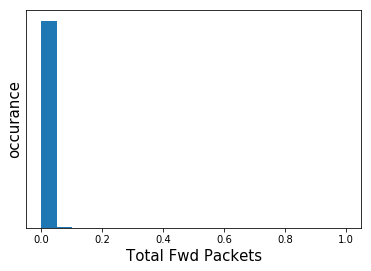

In [86]:
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}

plt.hist(BenignMatrix[:,2],20)
plt.ylabel('occurance', font2)
plt.xlabel("Total Fwd Packets", font2)
plt.ylabel('occurance', font2)
plt.yticks([])
#plt.xlim(0, 1)
plt.savefig("2_Total_Fwd_Packets_Benign_Distribution.eps",format="eps")
#plt.show()

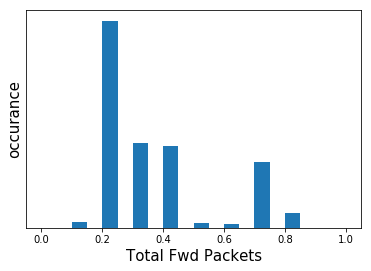

In [87]:
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}

plt.hist(DDosMatrix[:,2],20)
plt.ylabel('occurance', font2)
plt.xlabel("Total Fwd Packets", font2)
plt.ylabel('occurance', font2)
plt.yticks([])
#plt.xlim(0, 1)
plt.savefig("3_Total_Fwd_Packets_DDoS_Distribution.eps",format="eps")
#plt.show()

In [89]:
print(DDosMatrix[100])

[0.00000000e+00 6.83805317e-02 3.00000000e-01 0.00000000e+00
 2.64705882e-01 0.00000000e+00 0.00000000e+00 1.00000000e+00
 4.28571429e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.09354213e-09 2.62954931e-07
 5.36016516e-02 7.13558845e-02 7.03652178e-02 7.87330103e-06
 6.90056214e-02 5.36016516e-02 7.13558845e-02 7.03652178e-02
 7.87330103e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.83018868e-01 0.00000000e+00
 3.75186356e-07 0.00000000e+00 1.00000000e+00 0.00000000e+00
 2.06736153e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.93865242e-03 4.28571429e-01 0.00000000e+00 2.83018868e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.00000000e-01 2.64705882e-01
 0.00000000e+00 0.000000